# El tratamiendo de las variables categóricas

In [46]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
data_frame = pd.read_csv("../datasets/ecom-expense/Ecom Expense.csv")
data_frame.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [3]:
# vemos que hay dos variables categóricas, GENDER y CITY TIER, toca crear dummies para volverlas numéricas. 
dummy_gender = pd.get_dummies(data_frame["Gender"], prefix="Gender")
dummy_city_tier = pd.get_dummies(data_frame["City Tier"], prefix="City")

In [4]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [5]:
dummy_city_tier.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [6]:
#Tenemos qu hacer un join de estos datasets que categorizan con el dataframe original
column_names = data_frame.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [7]:
data_frame_new = data_frame[column_names].join(dummy_gender)
column_names = data_frame_new.columns.values.tolist()
data_frame_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [8]:
data_frame_new = data_frame_new[column_names].join(dummy_city_tier)
data_frame_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [9]:
# Ahora vamos a reducir el dataset a lo que nos importa:
feature_cols = ["Monthly Income","Transaction Time",
               "Gender_Female","Gender_Male",
               "City_Tier 1","City_Tier 2","City_Tier 3", 
               "Record"]

In [10]:
var_entrada = data_frame_new[feature_cols]
var_salida = data_frame["Total Spend"]

In [11]:
linear_regression = LinearRegression()
linear_regression.fit(var_entrada, var_salida)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
print(linear_regression.intercept_)
print(linear_regression.coef_)

-79.41713030136816
[ 1.47538980e-01  1.54946125e-01 -1.31025013e+02  1.31025013e+02
  7.67643260e+01  5.51389743e+01 -1.31903300e+02  7.72233446e+02]


In [13]:
# podemos juntar cada una de las columnas con sus coeficientes con ZIP!
list(zip(feature_cols, linear_regression.coef_))

[('Monthly Income', 0.14753898049205733),
 ('Transaction Time', 0.1549461254958966),
 ('Gender_Female', -131.0250132555464),
 ('Gender_Male', 131.02501325554658),
 ('City_Tier 1', 76.76432601049548),
 ('City_Tier 2', 55.138974309232275),
 ('City_Tier 3', -131.9033003197278),
 ('Record', 772.2334457445638)]

Obserar como en los dummies los valores se complementan de manera que si se suman entre los que se relacionan dan como resultado 0. 


In [14]:
# Si queremos ver que tan bueno es el modelo:  SI SCORE es baja, toca empezar a añadir DE A UNA de las otras var.

linear_regression.score(var_entrada, var_salida)

0.9179923586131016

* **Se agregará RECORD en el data set seleccionado para ver si cambia! entonces retroceder a donde se escogieron las variables que serían las de entrada para el modelo y revisar si el escore empieza a subir**

* **Después se agregó AGE y nos dimos cuenta que no sirve, no es relavante**

Después de lo anterior el modelo puede ser descrito entonces como: 

* **TotalSpend** = -79.41713030136816 + ('Monthly Income' * 0.14753898049205733)+
 ('Transaction Time'* 0.1549461254958966)+
 ('Gender_Female'* -131.0250132555464)+
 ('Gender_Male'* 131.02501325554658)+
 ('City_Tier 1'* 76.76432601049548)+
 ('City_Tier 2'* 55.138974309232275)+
 ('City_Tier 3'* -131.9033003197278)+
 ('Record'* 772.2334457445638)
     
     * **Si es hombre y vive en CT1:** 
         * **TotalSpend** = -79.41713030136816 + ('Monthly Income' * 0.14753898049205733)+('Transaction Time'* 0.1549461254958966)+ 131.02501325554658+ 76.76432601049548 + ('Record'* 772.2334457445638)
     * **Si es hombre y vive en CT2:** 
         * **TotalSpend** = -79.41713030136816 + ('Monthly Income' * 0.14753898049205733)+('Transaction Time'* 0.1549461254958966)+ 131.02501325554658+ 55.138974309232275 + ('Record'* 772.2334457445638)
     * **Si es hombre y vive en CT3:** 
         * **TotalSpend** = -79.41713030136816 + ('Monthly Income' * 0.14753898049205733)+('Transaction Time'* 0.1549461254958966)+ 131.02501325554658 -131.9033003197278 + ('Record'* 772.2334457445638)
     * **Si es mujer y vive en CT1:** 
         * **TotalSpend** = -79.41713030136816 + ('Monthly Income' * 0.14753898049205733)+('Transaction Time'* 0.1549461254958966)- 131.02501325554658+ 76.76432601049548 + ('Record'* 772.2334457445638)
     * **Si es mujer y vive en CT2:** 
         * **TotalSpend** = -79.41713030136816 + ('Monthly Income' * 0.14753898049205733)+('Transaction Time'* 0.1549461254958966)- 131.02501325554658+ 55.138974309232275 + ('Record'* 772.2334457445638)
     * **Si es mujer y vive en CT3:** 
         * **TotalSpend** = -79.41713030136816 + ('Monthly Income' * 0.14753898049205733)+('Transaction Time'* 0.1549461254958966)- 131.02501325554658 -131.9033003197278 + ('Record'* 772.2334457445638)
 
 Vamos entonces a recrear la predicción en una nueva columna del dataset seleccionado:


In [15]:
data_frame_new["prediction"] = -79.41713030136816 + (data_frame_new['Monthly Income'] * 0.14753898049205733)+(data_frame_new['Transaction Time'] * 0.1549461254958966)+(data_frame_new['Gender_Female'] * -131.0250132555464)+(data_frame_new['Gender_Male'] * 131.02501325554658)+(data_frame_new['City_Tier 1'] * 76.76432601049548)+(data_frame_new['City_Tier 2'] * 55.138974309232275)+(data_frame_new['City_Tier 3'] * -131.9033003197278)+(data_frame_new['Record'] * 772.2334457445638)

In [16]:
data_frame_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [17]:
SSD = np.sum((data_frame_new["prediction"]-data_frame_new["Total Spend"])**2)
SSD

1517733985.340816

In [18]:
# 803 euros arriba y 803 euros abajo!
RSE = np.sqrt(SSD/(len(data_frame_new)-len(feature_cols)-1))
RSE

803.1318809818165

In [19]:
total_spend_mean = np.mean(data_frame_new["Total Spend"])
total_spend_mean

6163.176415976714

In [20]:
# Error de 13% !
error = RSE/total_spend_mean
error

0.13031135680294162

In [21]:
# Otra forma de hacerlo más fácil es a través de PREDICTION 
data_frame_new["new_prediction"] = linear_regression.predict(pd.DataFrame(data_frame_new[feature_cols]))

In [22]:
# Vemos que son exactamente los mismos valores sin tener necesidad de copiar TODO el modelo. 
data_frame_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction,new_prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335,3581.980335


## Eliminar variables dummies redundantes

Cuando hay n variables categóricas, el número de columnas o información que se necesita para categorizar es simplemente n-1. 

Lo volveremos a hacer todo teniendo en cuenta lo anterior: 

In [23]:
# variables categóricas: GENDER. Recuerde ILOC [Filas, Columnas] (rangos)
dummy_gender = pd.get_dummies(data_frame["Gender"], prefix="Gender").iloc[:,1:]

In [25]:
dummy_gender.head()

,Gender_Male
0,0
1,0
2,1
3,0
4,0


In [26]:
# variables categóricas: City. Recuerde ILOC [Filas, Columnas] (rangos)
dummy_city_tier = pd.get_dummies(data_frame["City Tier"], prefix="City").iloc[:,1:]

In [27]:
dummy_city_tier.head()

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


In [31]:
column_names = data_frame.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [32]:
data_frame_new = data_frame[column_names].join(dummy_gender)
column_names = data_frame_new.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend',
 'Gender_Male']

In [35]:
data_frame_new = data_frame_new[column_names].join(dummy_city_tier)
data_frame_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [36]:
# Ahora vamos a reducir el dataset a lo que nos importa:
feature_cols = ["Monthly Income","Transaction Time",
               "Gender_Male","City_Tier 2","City_Tier 3", 
               "Record"]

In [38]:
# Creamos entonces la solución del modelo lineal con scikit learn. 
X = data_frame_new[feature_cols]
Y = data_frame_new["Total Spend"]
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
print(lm.intercept_)

-133.67781754642238


In [40]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205735),
 ('Transaction Time', 0.15494612549589748),
 ('Gender_Male', 262.05002651109527),
 ('City_Tier 2', -21.625351701262765),
 ('City_Tier 3', -208.66762633022327),
 ('Record', 772.2334457445639)]

In [41]:
lm.score(X,Y)

0.9179923586131016

**Coeficientes con todas las variables en el modelo**
* ('Monthly Income', 0.14753898049205733),
* ('Transaction Time', 0.1549461254958966),
* ('Gender_Female', -131.0250132555464),
* ('Gender_Male', 131.02501325554658),
* ('City_Tier 1', 76.76432601049548),
* ('City_Tier 2', 55.138974309232275),
* ('City_Tier 3', -131.9033003197278),
* ('Record', 772.2334457445638)
 
**Coeficientes tras enmascarar las variables dummies pertinentes**
* ('Monthly Income', 0.14753898049205735),
* ('Transaction Time', 0.15494612549589748),
* ('Gender_Male', 262.05002651109527),
* ('City_Tier 2', -21.625351701262765),
* ('City_Tier 3', -208.66762633022327),
* ('Record', 772.2334457445639)

**Los cambios se reflejan en:**
* Gender_Male: 
    * antes -> 131.02
    * después -> 262.05 = (131.02 -(-131.02))
* Gender_Female:  
    * antes -> -131.02
    * después -> 0
* CT1: 
    * antes -> 76.76
    * después -> 0
* CT2: 
    * antes -> 55.13
    * después -> -21.62 = (55.13 - 76.76) 
* CT3: 
    * antes -> -131.90
    * después -> -208.66 = (-131.90 - 76.76) 


# Transformación de variables para conseguir una relación no lineal

In [43]:
data_auto =  pd.read_csv("../datasets/auto/auto-mpg.csv")
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [44]:
data_auto.shape

(406, 9)

Text(0.5, 1.0, 'HP vs MPG')

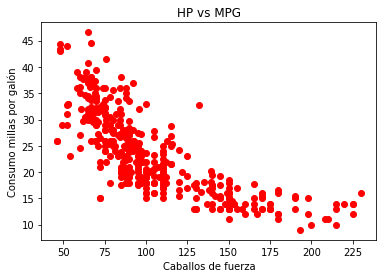

In [47]:
%matplotlib inline
data_auto["mpg"]= data_auto["mpg"].dropna()
data_auto["horsepower"]= data_auto["horsepower"].dropna()
plt.plot(data_auto["horsepower"], data_auto["mpg"], "ro")
plt.xlabel("Caballos de fuerza")
plt.ylabel("Consumo millas por galón")
plt.title("HP vs MPG")

### Modelo de regresión lineal 

* mpg = a + b * horsepower

In [62]:
X = data_auto["horsepower"].fillna(data_auto["horsepower"].mean())
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())
X_data = (X[:, np.newaxis])

In [56]:
lm = LinearRegression()
lm.fit(X[:, np.newaxis],Y)
# Al principio no funcionaba porque tenía error de que X es solo un vector y LM debe ser un dataframe. 
# Este problema se soluciona con NEWAXIS. 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [57]:
type(X)

pandas.core.series.Series

In [63]:
type(X_data)   # array Ndimensional 

numpy.ndarray

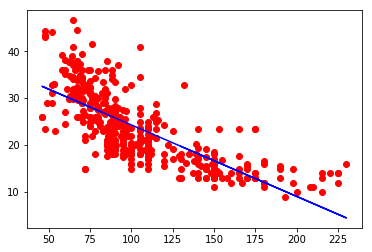

In [61]:
%matplotlib inline 
plt.plot(X,Y, "ro")
plt.plot(X,lm.predict(X[:, np.newaxis]), color="blue")

In [69]:
# A PARTIR DE ACÁ HACEMOS TODO EL ANÁLISIS! 
lm.score(X_data, Y)   #Factor R² 

0.574653340645025

In [70]:
SSD = np.sum((Y-lm.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X_data)-1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD, RSE, y_mean, error*100

(10315.75196006092, 5.046879480825511, 23.51457286432162, 21.46277336163346)

### Modelo de regresión cuadrático

* mpg = a + b * horsepower^2

In [71]:
X_data = X**2
X_data = X_data[:, np.newaxis]

In [72]:
lm = LinearRegression()
lm.fit(X_data,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [73]:
# A PARTIR DE ACÁ HACEMOS TODO EL ANÁLISIS! 
lm.score(X_data, Y)   #Factor R² 

0.4849887034823205

In [77]:
SSD = np.sum((Y-lm.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X_data)-1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD, RSE, y_mean, error*100

# ACA VEMOS QUE AUMENTO EL ERROR!!!!

(12490.350340501926, 5.553410772769817, 23.51457286432162, 23.6168898529981)

### Modelo de regresión lineal y cuadrático¶
mpg = a + b *horsepower + c *horsepower^2

In [78]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [79]:
poly = PolynomialFeatures(degree=2)

In [80]:
X_data = poly.fit_transform(X[:, np.newaxis])

In [81]:
lm = linear_model.LinearRegression()
lm.fit(X_data, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [83]:
# A PARTIR DE ACÁ HACEMOS TODO EL ANÁLISIS! 
lm.score(X_data, Y)   #Factor R² 

# Por este valor podemos aceptar el modelo y sacamos la ecuación entonces: 

0.6439066584257469

In [84]:
lm.intercept_

55.02619244708117

In [85]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

a partir de lo anterior tenemos entonces que la ecuación del modelo es: 
    
   <b> mpg = 55.026 - 0.434 hp + 0.00112615 hp^2 </b>

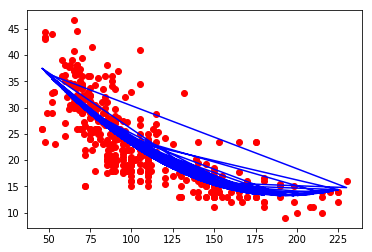

In [87]:
%matplotlib inline 
plt.plot(X,Y, "ro")
plt.plot(X,lm.predict(X_data), color="blue")

In [97]:
# podemos inclusive hacer transformaciones para varios grados de polinomio buscando el mejor: 

for d in range (2, 6): 
    poly = PolynomialFeatures(degree=d)
    X_data = poly.fit_transform(X[:, np.newaxis])
    lm = linear_model.LinearRegression()
    lm.fit(X_data, Y)
    print("Regresión de grado: " + str(d))
    print("R2: " + str(lm.score(X_data, Y)))
    print(lm.intercept_)
    print(lm.coef_)
    regression_validation(lm,X_data, Y)

Regresión de grado: 2
R2: 0.6439066584257469
55.02619244708117
[ 0.         -0.43404318  0.00112615]
SSD: 8636.1806435245, RSE: 4.617781158036539, Y_mean: 23.51457286432162, Error:19.637954661906885
Regresión de grado: 3
R2: 0.6444678885560742
58.44877411167265
[ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]
SSD: 8622.569367428552, RSE: 4.614140736300908, Y_mean: 23.51457286432162, Error:19.622473106036676
Regresión de grado: 4
R2: 0.6467674189704503
40.09664386278185
[ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840093e-08]
SSD: 8566.79983249135, RSE: 4.599194731579757, Y_mean: 23.51457286432162, Error:19.558912501268775
Regresión de grado: 5
R2: 0.6547512491818561
-40.69399193581289
[ 0.00000000e+00  4.00021892e+00 -7.54802466e-02  6.19621640e-04
 -2.36220984e-06  3.41983064e-09]
SSD: 8373.171387690587, RSE: 4.546921733827953, Y_mean: 23.51457286432162, Error:19.336612066328208


In [96]:
def regression_validation(lm, X_data, Y):
    SSD = np.sum((Y-lm.predict(X_data))**2)
    RSE = np.sqrt(SSD/(len(X_data)-1))
    y_mean = np.mean(Y)
    error = RSE/y_mean
    print("SSD: "+str(SSD)+", RSE: "+str(RSE)+", Y_mean: "+str(y_mean)+", Error:"+str(error*100))


# El problema de los outliers 

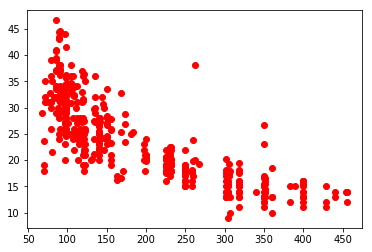

In [98]:
plt.plot(data_auto["displacement"], data_auto["mpg"], "ro")

In [100]:
X = data_auto["displacement"].fillna(data_auto["displacement"].mean())
X = X[:, np.newaxis]
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())

lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [102]:
lm.score(X,Y)  #Este es R2 

0.6261049762826918

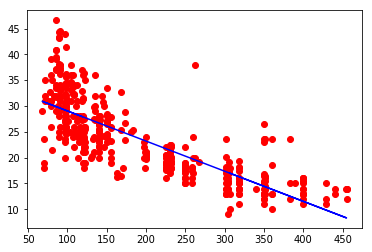

In [103]:
%matplotlib inline 
plt.plot(X,Y, "ro")
plt.plot(X,lm.predict(X), color="blue")

In [104]:
#Analizando el gráfico cazaremos el outlier:
data_auto[(data_auto["displacement"]>250)&(data_auto["mpg"]>35)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [105]:
data_auto[(data_auto["displacement"]>300)&(data_auto["mpg"]>20)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


In [106]:
data_auto_clean = data_auto.drop([395, 258, 305, 372])

In [107]:
X = data_auto_clean["displacement"].fillna(data_auto_clean["displacement"].mean())
X = X[:, np.newaxis]
Y = data_auto_clean["mpg"].fillna(data_auto_clean["mpg"].mean())

lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [108]:
lm.score(X,Y)  #Este es R2 

0.6466514317531822

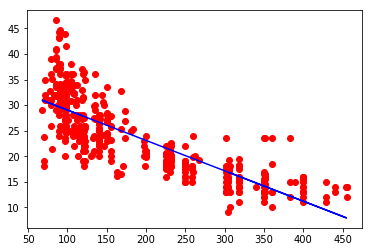

In [109]:
%matplotlib inline 
plt.plot(X,Y, "ro")
plt.plot(X,lm.predict(X), color="blue")